Hi, everyone, I'm new to kaggle and this is my first kaggle kernel. Let me know if you have any questions.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/kuc-hackathon-winter-2018/drugsComTest_raw.csv
/kaggle/input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv


In [2]:
df = pd.read_csv('../input/kuc-hackathon-winter-2018/drugsComTrain_raw.csv', parse_dates=["date"])
df_test = pd.read_csv('../input/kuc-hackathon-winter-2018/drugsComTest_raw.csv', parse_dates=["date"])

In [3]:
print(df.shape)
print(df_test.shape)

(161297, 7)
(53766, 7)


In [4]:
df['month'] = df.date.apply(lambda i: i.month)
df['day'] = df.date.apply(lambda i: i.day)
df['year'] = df.date.apply(lambda i: i.year)

df_test['month'] = df_test.date.apply(lambda i: i.month)
df_test['day'] = df_test.date.apply(lambda i: i.day)
df_test['year'] = df_test.date.apply(lambda i: i.year)

df['reviewLength'] = df.review.apply(lambda x: len(x.split()))
df_test['reviewLength'] = df_test.review.apply(lambda x: len(x.split()))

In [5]:
df.dtypes

uniqueID                 int64
drugName                object
condition               object
review                  object
rating                   int64
date            datetime64[ns]
usefulCount              int64
month                    int64
day                      int64
year                     int64
reviewLength             int64
dtype: object

# 1. EDA 


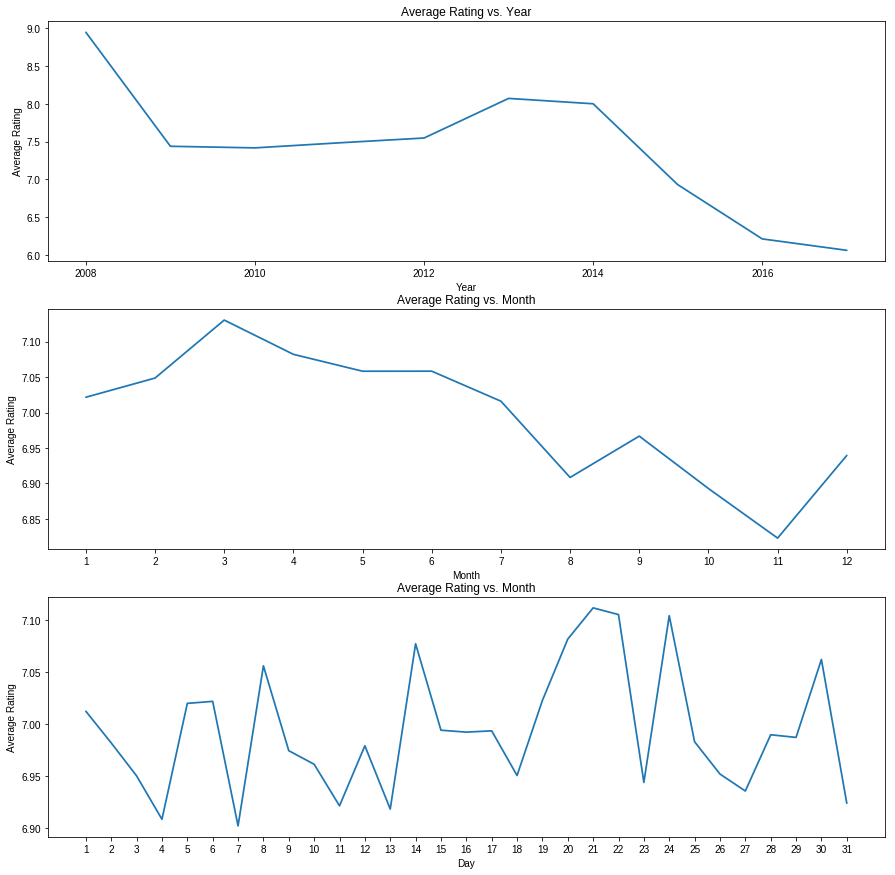

In [6]:
fig, ax = plt.subplots(3,1, figsize=(15,15))

plt.style.use('seaborn')

# Score by year
ax[0].plot(df.groupby('year').rating.mean())
ax[0].set_ylabel('Average Rating')
ax[0].set_xlabel('Year')
ax[0].set_title('Average Rating vs. Year')
# plt.show()

ax[1].plot(df.groupby('month').rating.mean())
ax[1].set_ylabel('Average Rating')
ax[1].set_xlabel('Month')
ax[1].set_xticks(range(1,13))
ax[1].set_title('Average Rating vs. Month')

ax[2].plot(df.groupby('day').rating.mean())
ax[2].set_ylabel('Average Rating')
ax[2].set_xlabel('Day')
ax[2].set_xticks(range(1,32))
ax[2].set_title('Average Rating vs. Month')

plt.show()

Here are some fun facts about the data.The first one is about review length: as shown in the blue line in the following figure. Review length is shortest for best and worst ratings. 
Now let’s look at the red line, it seems the higher the rating, the more people would find the review helpful. 

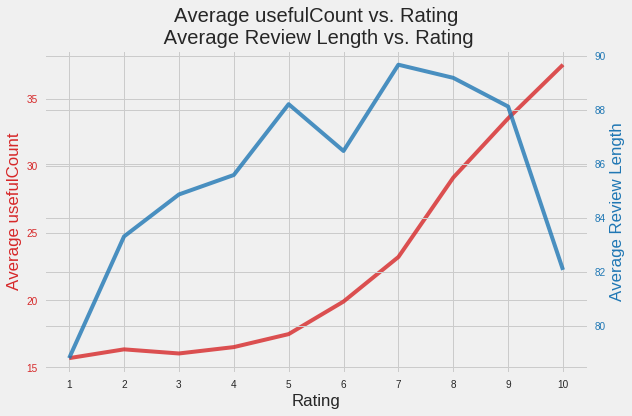

In [7]:
# Create some mock data

# plt.figure(figsize=(12,8))
plt.style.use('fivethirtyeight')

fig, ax1 = plt.subplots(figsize=(9,6))
t = range(1,11)

color = 'tab:red'
ax1.set_xlabel('Rating')
ax1.set_ylabel('Average usefulCount', color=color)
ax1.plot(t, df.groupby('rating').usefulCount.mean(), color=color, alpha=0.8)
ax1.set_xticks(range(1,11))
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_title('Average usefulCount vs. Rating\n Average Review Length vs. Rating')

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Average Review Length', color=color)  # we already handled the x-label with ax1
ax2.plot(t, df.groupby('rating').reviewLength.mean(), color=color, alpha=0.8)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

This ‘bias’ pattern is more extreme on Depression drug reviews. As shown in following figure. For all drugs, the reviews giving a rating higher than 6 get 82% of all useful counts, and the percentage rise to 86% for depression drug reviews. 

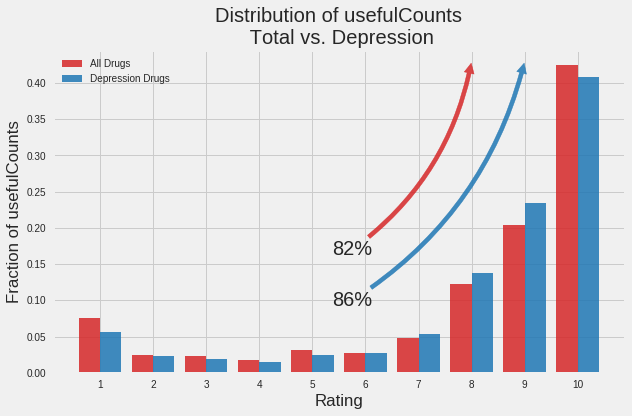

In [8]:
# Make side-by-side barplot
plt.figure(figsize=(9,6))
plt.style.use('fivethirtyeight')


def make_hist(data1, data2, density=True) -> None:
    """make hist plot of useful counts given data, plot fraction if density is True"""
#     print(data.shape)
    total_counts1 = data1.usefulCount.sum()
    total_counts2 = data2.usefulCount.sum()
#     print(total_counts)
    
    sum_counts1 = data1.groupby('rating').usefulCount.sum()
    frac_counts1 = sum_counts1/total_counts1
    frac1_6_10 = data1.groupby('rating').usefulCount.sum()[5:].sum()/total_counts1
    sum_counts2 = data2.groupby('rating').usefulCount.sum()
    frac_counts2 = sum_counts2/total_counts2
    frac2_6_10 = data2.groupby('rating').usefulCount.sum()[5:].sum()/total_counts2
#     print(sum_counts)
#     print(sum_counts.sum())

    plt.bar([i-0.2 for i in range(1,11)],frac_counts1,width=0.4,  label='Total Average', color = 'tab:red', alpha=0.85)
    plt.bar([i+0.2 for i in range(1,11)],frac_counts2,width=0.4,  label='Depression Average', color = 'tab:blue', alpha=0.85)
    
    plt.annotate(str(int(frac2_6_10*100))+'%',
            xy=(9, 0.43), xycoords='data',
            xytext=(5.75, 0.1), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2",
                            color='tab:blue', alpha=0.85),
            )
    plt.annotate(str(int(frac1_6_10*100))+'%',
            xy=(8, 0.43), xycoords='data',
            xytext=(5.75, 0.17), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=0.2",
                            color='tab:red', alpha=0.85),
            )
    
    
    plt.xticks(range(1,11))
    plt.xlabel('Rating')
    plt.legend(['All Drugs','Depression Drugs'])
    plt.ylabel('Fraction of usefulCounts')
    plt.title('Distribution of usefulCounts\n Total vs. Depression')
    plt.tight_layout() 
    plt.show()

make_hist(df, df.loc[df.condition=='Depression',:])

# 2. Preprocessing Text
## 2.1 Deal with html symbols
Since the data was collected by crowling the pharmacy website, it contains some special symbols like "&#039" and "&amp;" whick represent "'" and "&". So, first let's deal with these symbols.

In [9]:
# Before
print(df.review[5])

"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up &amp; hurt! Leg/ankles aches   severe lower bowel preassure like you need to go #2 but can&#039;t! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I&#039;m 50 &amp; work out 3Xs a week. Not worth side effects!"


In [10]:
##### Step 1. deal with html special symbols
# https://stackoverflow.com/questions/753052/strip-html-from-strings-in-python

from html.parser import HTMLParser

class MLStripper(HTMLParser):
    def __init__(self):
        self.reset()
        self.strict = False
        self.convert_charrefs= True
        self.fed = []
    def handle_data(self, d):
        self.fed.append(d)
    def get_data(self):
        return ''.join(self.fed)

def strip_tags(html):
    s = MLStripper()
    s.feed(html)
    return s.get_data()

df['review'] = df.review.apply(lambda x: strip_tags(x))
df_test['review'] = df_test.review.apply(lambda x: strip_tags(x))

In [11]:
# After
print(df.review[5])

"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up & hurt! Leg/ankles aches   severe lower bowel preassure like you need to go #2 but can't! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I'm 50 & work out 3Xs a week. Not worth side effects!"


## 2.2 Remove contractions

In [12]:
# Step 2. Remove contractions

!pip install textsearch
!pip install contractions

import contractions # need textsearch as well

df['review'] = df['review'].map(lambda x: contractions.fix(x))
df_test['review'] = df_test['review'].map(lambda x: contractions.fix(x))

print(df.review[5])

"2nd day on 5mg started to work with rock hard erections however experianced headache, lower bowel preassure. 3rd day erections would wake me up & hurt! Leg/ankles aches   severe lower bowel preassure like you need to go #2 but can not! Enjoyed the initial rockhard erections but not at these side effects or $230 for months supply! I am 50 & work out 3Xs a week. Not worth side effects!"


## 2.3 Convert to lowercase, remove numbers and punctuations

In [13]:
# Step 3. Convert to lowercase

df['review'] = df['review'].map(lambda x: x.lower())
df_test['review'] = df_test['review'].map(lambda x: x.lower())

# Step 4. Remove numbers
import re

df['review'] = df['review'].map(lambda x: re.sub(r'\d+', '', x))
df_test['review'] = df_test['review'].map(lambda x: re.sub(r'\d+', '', x))

# Step 5. Remove punctuation
df['review'] = df['review'].map(lambda x: re.sub('[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]', '', x))
df_test['review'] = df_test['review'].map(lambda x: re.sub('[!”#$%&’()*+,-./:;<=>?@[\]^_`{|}~]', '', x))

df['review'] = df['review'].map(lambda x: x.split('"')[1])
df_test['review'] = df_test['review'].map(lambda x: x.split('"')[1])


print(df.review[5])

nd day on mg started to work with rock hard erections however experianced headache lower bowel preassure rd day erections would wake me up  hurt legankles aches   severe lower bowel preassure like you need to go  but can not enjoyed the initial rockhard erections but not at these side effects or  for months supply i am   work out xs a week not worth side effects


## 2.4 Lemmatization

In [14]:
# Step 6. Lemmatize
## This step is time-consuming

from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
lemmatizer=WordNetLemmatizer()

df['review'] = df['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="v") for word in word_tokenize(x)))
df_test['review'] = df_test['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="v") for word in word_tokenize(x)))

df['review'] = df['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="n") for word in word_tokenize(x)))
df_test['review'] = df_test['review'].map(lambda x: ' '.join(lemmatizer.lemmatize(word, pos="n") for word in word_tokenize(x)))

print(df.review[5])

nd day on mg start to work with rock hard erection however experianced headache lower bowel preassure rd day erection would wake me up hurt legankles ache severe lower bowel preassure like you need to go but can not enjoy the initial rockhard erection but not at these side effect or for month supply i be work out x a week not worth side effect


## 2.5 Removing stop words

In [15]:
# Step 8. Removing stop words
from nltk.corpus import stopwords
stopword = stopwords.words('english')

# text = “This is a Demo Text for NLP using NLTK. Full form of NLTK is Natural Language Toolkit”
# word_tokens = word_tokenize(text)
# removing_stopwords = [word for word in word_tokens if word not in stopword]
# print (removing_stopwords)

df['review'] = df['review'].map(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stopword))
df_test['review'] = df_test['review'].map(lambda x: ' '.join(word for word in word_tokenize(x) if word not in stopword))

print(df.review[5])

nd day mg start work rock hard erection however experianced headache lower bowel preassure rd day erection would wake hurt legankles ache severe lower bowel preassure like need go enjoy initial rockhard erection side effect month supply work x week worth side effect


# 3. Classification
I was hoping to adding other review data to this project. So I convert the rating from 1-10 to 1-5, since other reivew data like yelp and amazon only have 1-5 ratings.****

In [16]:
# Convert rating to 1-5
df.rating = (df.rating.values+1)//2
df_test.rating = (df_test.rating.values+1)//2

In [17]:
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report

log_losses = []
y_test = pd.get_dummies(df_test.rating)
y_pred = y_test.copy()

## 3.1 Random Guessing
First, let's set random guessing as our benchmark.

In [18]:
# Random guessing
y_pred.iloc[:,:] = 0.2
log_losses.append(log_loss(y_test, y_pred))

## 3.2 Logistic regression with numeric variables (year, month, review length)

In [19]:
clf = OneVsRestClassifier(LogisticRegression(solver = 'liblinear'))
X_train = df.loc[:,['year','month','reviewLength']]
y_train = df.rating
X_test = df_test.loc[:,['year','month','reviewLength']]
clf.fit(X_train, y_train)

y_pred = clf.predict_proba(X_test)
log_losses.append(log_loss(y_test, y_pred))

## 3.3 Logistic regression with reviews

In [20]:
X_train = df.review
y_train = df.rating

# create the pipeline object
pl1 = Pipeline([
        ('vectorizer', CountVectorizer()),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))])


# fit the pipeline to our training data
%time pl1.fit(X_train, y_train)

CPU times: user 5min 45s, sys: 984 ms, total: 5min 46s
Wall time: 4min 43s


Pipeline(memory=None,
         steps=[('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('clf',
                 OneVsRestClassifier(estimator=LogisticRegression(C=1.0,
                                                                  class_weight=None,
                                                                  dual=False,
                                                                  fit

In [21]:
y_pred = pl1.predict_proba(df_test.review)
log_losses.append(log_loss(y_test, y_pred))

In [22]:
from sklearn.metrics import classification_report

## 3.4 use `countVectorizer` with `ngram_range=(1,2)`

In [23]:
# set a reasonable number of features before adding interactions
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
# create the pipeline object
pl2 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(1, 2))),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear')))])

# fit the pipeline to our training data
%time pl2.fit(X_train, y_train)

y_pred = pl2.predict_proba(df_test.review)
log_losses.append((log_loss(y_test, y_pred)))
print(log_losses)

CPU times: user 12min 35s, sys: 1.86 s, total: 12min 37s
Wall time: 11min 39s
[1.6094379124341, 1.3646977440338244, 0.9939670398439974, 0.6321589709936334]


## 3.5 use `countVectorizer` with `ngram_range=(2,4)`

In [24]:
# create the pipeline object
pl3 = Pipeline([
        ('vectorizer', CountVectorizer(ngram_range=(2, 4))),
        ('clf', OneVsRestClassifier(LogisticRegression(solver='liblinear', class_weight='balanced')))])

%time pl3.fit(X_train, y_train)

y_pred = pl3.predict_proba(df_test.review)
log_losses.append((log_loss(y_test, y_pred)))
print(log_losses)

CPU times: user 13min 50s, sys: 8.78 s, total: 13min 59s
Wall time: 12min 51s
[1.6094379124341, 1.3646977440338244, 0.9939670398439974, 0.6321589709936334, 0.5688340111551585]


In [25]:
print(classification_report(pl3.predict(df_test.review), df_test.rating))

              precision    recall  f1-score   support

           1       0.84      0.80      0.82     10177
           2       0.65      0.88      0.75      2871
           3       0.63      0.86      0.73      3543
           4       0.66      0.81      0.73      7606
           5       0.94      0.83      0.88     29569

    accuracy                           0.83     53766
   macro avg       0.75      0.84      0.78     53766
weighted avg       0.85      0.83      0.83     53766



In [26]:
labels = ['Random Guess', 'LogisticRegression \nwith numeric variables', 
          'LogisticRegression \nwith text', 'LogisticRegression \nwith text(ngram=(1,2))', 'LogisticRegression \nwith text(ngram=(2,4))' ]

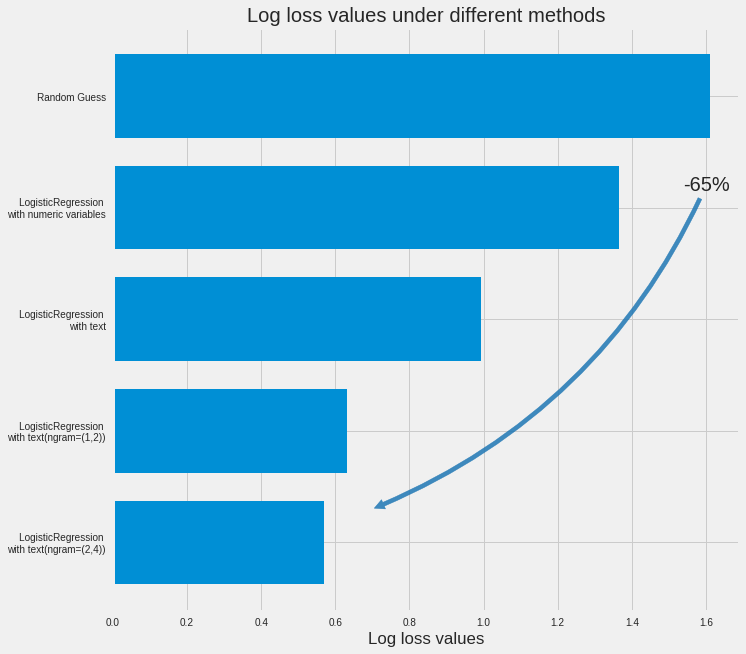

In [27]:
plt.style.use('fivethirtyeight')
# plt.figure()
fig, ax = plt.subplots(figsize=(10,10))
ind = np.arange(len(labels))
width = 0.75

ax.barh(ind,log_losses[::-1], width)
ax.set_yticks(ind)
ax.set_yticklabels(labels[::-1])
plt.xlabel('Log loss values')

plt.annotate('-65%',
            xy=(0.7, 0.3), xycoords='data',
            xytext=(1.6, 3.2), textcoords='data',
            size=20, va="center", ha="center",
            arrowprops=dict(arrowstyle="simple",
                            connectionstyle="arc3,rad=-0.2",
                            color='tab:blue', alpha=0.85),
            )

# plt.ylabel('Methods')
plt.title('Log loss values under different methods')
# plt.tight_layout() 
plt.show()

# 4 Topic Modeling
## 4.1 Word Cloud

In [28]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

all = pd.concat([df.iloc[:,0:11], df_test])

1. Word cloud based on all drug reviews

There are 52310541 words in the combination of all review.


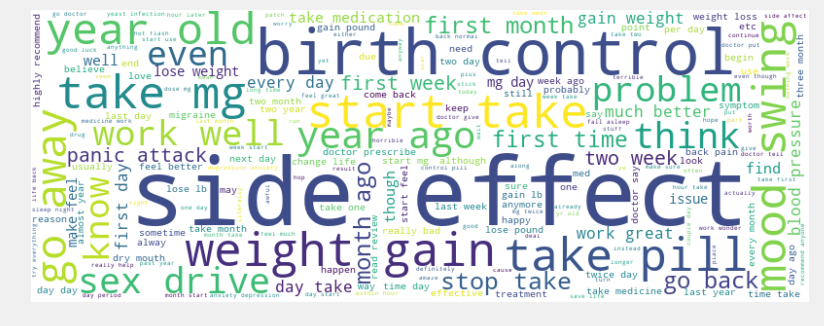

In [29]:
text = " ".join(review for review in all.review)

print ("There are {} words in the combination of all review.".format(len(text)))

# Create and generate a word cloud image:
wordcloud = WordCloud(width=800, height=300,background_color="white").generate(text)

plt.figure(figsize=(20,5))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

2. Word cloud based on 'Birth Control' drugs reviews

There are 10745208 words in the combination of all review.


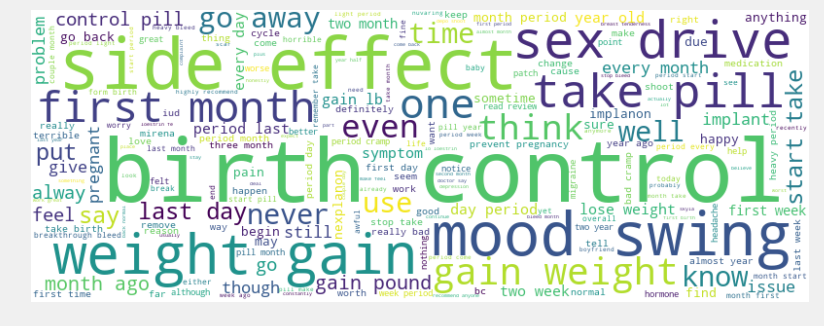

In [30]:
# Birth Control reviews

text = " ".join(review for review in all[all.condition=='Birth Control'].review)

print ("There are {} words in the combination of all review.".format(len(text)))

wordcloud = WordCloud(width=800, height=300,background_color="white").generate(text)

plt.figure(figsize=(20,5))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

2. Word cloud based on 'Depression' drugs reviews

There are 3157089 words in the combination of all review.


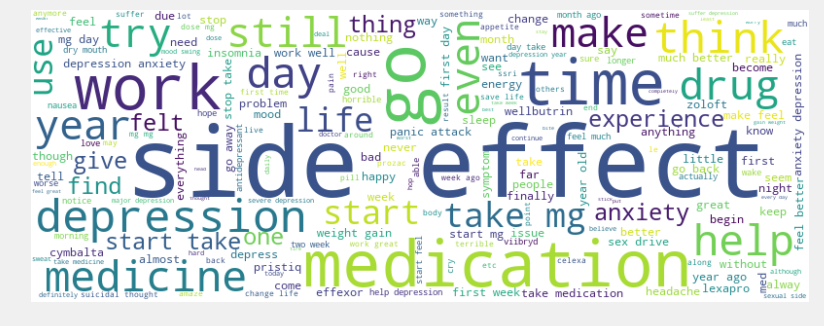

In [31]:
# Birth Control reviews

text = " ".join(review for review in all[all.condition=='Depression'].review)

print ("There are {} words in the combination of all review.".format(len(text)))

wordcloud = WordCloud(width=800, height=300,background_color="white").generate(text)

plt.figure(figsize=(20, 5))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## 4.2 Topic Modeling
Let's remove more stop words first.

In [32]:
verbs = ['take', 'get', 'go', 'work', 'start', 'day', 'days', 'feel', 'time', 'year', 'month', 'years', 'months', 'mg', 'like', 'would', 'use',\
         'first', 'try', 'doctor', 'pill', 'week', 'dose', 'lb', 'hour', 'one', 'never']

# remove drug names
new_set = set(all.drugName.tolist())
new_set = {i.lower() for i in new_set}

new_list=[]
for i in new_set:
    good = i.split()
    new_list.extend(good)
new_set=set(new_list)

all = all.copy()
all['review'] = all.review.map(lambda x: ' '.join(word for word in word_tokenize(x) if word not in verbs))
all['review'] = all.review.map(lambda x: ' '.join(word for word in word_tokenize(x) if word not in new_set))

In [33]:
%%time

# import warnings
# warnings.simplefilter("ignore", DeprecationWarning)

# Load the LDA model from sk-learn
from sklearn.decomposition import LatentDirichletAllocation as LDA
 
# Helper function
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))

CPU times: user 20 ms, sys: 0 ns, total: 20 ms
Wall time: 42.3 ms


In [34]:
count_vectorizer = CountVectorizer()
count_data = count_vectorizer.fit_transform(all[all.condition=='Birth Control'].review)

number_topics = 3
number_words = 8

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=1)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
cramp insertion period review experience bad painful insert

Topic #1:
period bleed spot since stop remove last implant

Topic #2:
period gain weight control birth mood side effect


In [35]:
count_data = count_vectorizer.fit_transform(all[all.condition=='Depression'].review)

number_topics = 3
number_words = 8

lda = LDA(n_components=number_topics, n_jobs=-1, random_state=55566)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
depression help anxiety weight life better make gain

Topic #1:
felt make could think better depression thing life

Topic #2:
effect side depression anxiety medication life help experience
